In [40]:
import time
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
from sklearn.utils import resample

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize=(20, 10))
    plt.title(title, fontsize=20, fontweight='bold')
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", fontsize=16)
    plt.ylabel("Score", fontsize=16)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, shuffle=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best", fontsize=15)
    return plt

# grid_param_2 is the one you do want to plot on the x-axis (e.g max depth)
def plot_grid_search_2(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, set_x_log=False):
    # Get Test Scores Mean and std for each grid search
    scores_mean = np.array(cv_results['mean_test_score']).reshape(len(grid_param_2),len(grid_param_1))
    scores_sd = np.array(cv_results['std_test_score']).reshape(len(grid_param_2),len(grid_param_1))

    times_mean = np.array(cv_results['mean_fit_time']).reshape(len(grid_param_2), len(grid_param_1))
    # Plot Grid search scores
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_1):
        ax1.plot(grid_param_2, scores_mean[:,idx], '--', label= name_param_1 + ': ' + str(val))
        ax1.plot(grid_param_2, scores_mean[:,idx], '*')

        
    ax1.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax1.set_xlabel(name_param_2, fontsize=16)
    ax1.set_ylabel('CV Average Score', fontsize=16)
#     ax1.legend(loc="best", fontsize=15)
    ax1.grid('on')
    if set_x_log:
        ax1.set_xscale('log')
    
    for idx, val in enumerate(grid_param_1):
        ax2.plot(grid_param_2, times_mean[:,idx], '--', label= name_param_1 + ': ' + str(val))
        ax2.plot(grid_param_2, times_mean[:,idx], '*')
        
    ax2.set_title("Fit times", fontsize=20, fontweight='bold')
    ax2.set_xlabel(name_param_2, fontsize=16)
    ax2.set_ylabel('Seconds', fontsize=16)
    ax2.legend(loc="best", fontsize=15)
    ax2.grid('on')
    if set_x_log:
        ax2.set_xscale('log')


# plots in log
def plot_grid_search(cv_results, grid_param, name_param, set_x_log=False):
    test_scores_mean = np.array(cv_results['mean_test_score'])
    train_scores_mean = np.array(cv_results['mean_train_score'])
    fit_times_mean = np.array(cv_results['mean_fit_time'])
    
    print(test_scores_mean)
    print(train_scores_mean)
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    ax1.plot(grid_param, test_scores_mean, '--', label=  'test set')
    ax1.plot(grid_param, train_scores_mean, '--', label= 'train set')
    ax1.plot(grid_param, test_scores_mean, '*')
    ax1.plot(grid_param, train_scores_mean, '*')
    ax1.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax1.set_xlabel(name_param, fontsize=16)
    ax1.set_ylabel('Score', fontsize=16)
    ax1.legend(loc="best", fontsize=15)
    if set_x_log:
        ax1.set_xscale('log')
        
    ax2.plot(grid_param, fit_times_mean, '--')
    ax2.plot(grid_param, fit_times_mean, '*')
    ax2.set_title("Fit times", fontsize=20, fontweight='bold')
    ax2.set_xlabel(name_param, fontsize=16)
    ax2.set_ylabel('Seconds', fontsize=16)
    ax2.legend(loc="best", fontsize=15)
    ax2.grid('on')
    if set_x_log:
        ax2.set_xscale('log')

# max depth of trees learned in grid search
def dectree_max_depth(tree):
    n_nodes = tree.node_count
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)


In [10]:
# want feature with more features than samples 
import pickle
with open("pickled_mnist.pkl", "br") as fh:
    data = pickle.load(fh)
train_imgs = data[0]
test_imgs = data[1]
train_labels = data[2]
test_labels = data[3]
train_labels_one_hot = data[4]
test_labels_one_hot = data[5]
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

train_labels.shape
X_train = train_imgs
y_train = train_labels.reshape(-1)
X_test = test_imgs
y_test = test_labels.reshape(-1)

In [19]:
tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, min_samples_split=20)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:

# Set the parameters by cross-validation
max_depths = np.linspace(2, 20, 10)
tuned_parameters = [{'max_depth' : max_depths}] # do 1, 2, 3, 4


estimator = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, min_samples_split=20)

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    gs = GridSearchCV(estimator, tuned_parameters, cv=5,
                       scoring=score)
    gs.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(gs.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, gs.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'max_depth': 14.0}

Grid scores on development set:

0.992 (+/-0.002) for {'max_depth': 2.0}
0.995 (+/-0.004) for {'max_depth': 4.0}
0.995 (+/-0.003) for {'max_depth': 6.0}
0.995 (+/-0.003) for {'max_depth': 8.0}
0.995 (+/-0.003) for {'max_depth': 10.0}
0.995 (+/-0.003) for {'max_depth': 12.0}
0.995 (+/-0.003) for {'max_depth': 14.0}
0.995 (+/-0.004) for {'max_depth': 16.0}
0.995 (+/-0.003) for {'max_depth': 18.0}
0.995 (+/-0.003) for {'max_depth': 20.0}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99       980
        1.0       1.00      0.99      1.00      1135

avg / total       0.99      0.99      0.99      2115




/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
No handles with labels found to put in legend.
/Users/whe318/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[0.99202527 0.9949467  0.9949467  0.99534149 0.99534149 0.99463087
 0.99542045 0.99502566 0.99510462 0.99518358]
[0.99330835 0.99664429 0.99749309 0.99757204 0.99759178 0.99759178
 0.99759178 0.99759178 0.99757204 0.99759178]


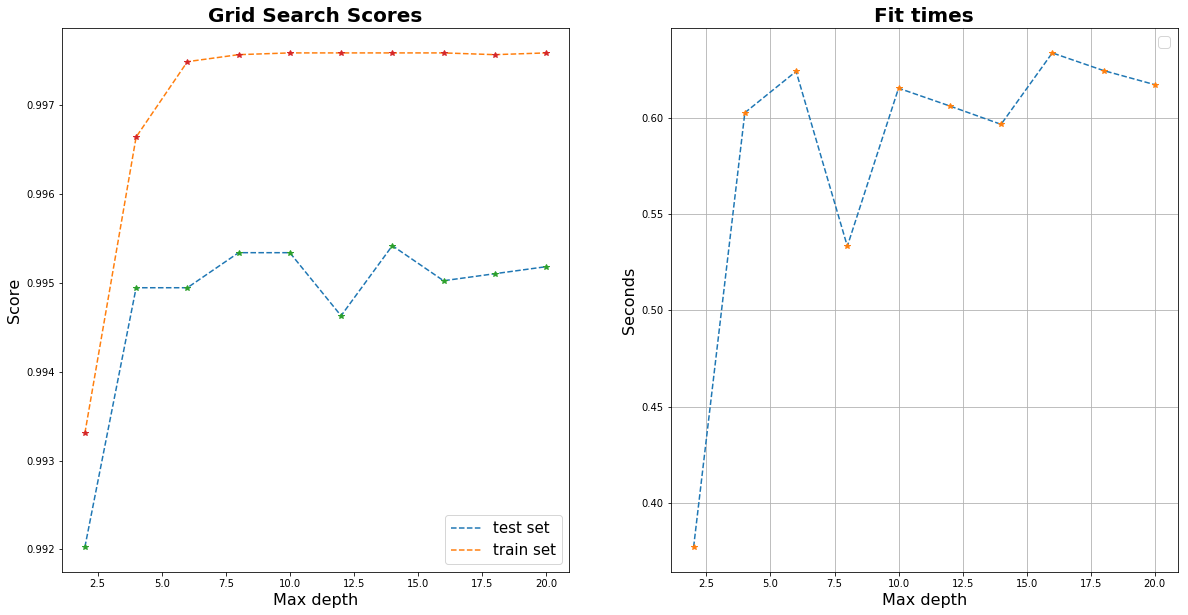

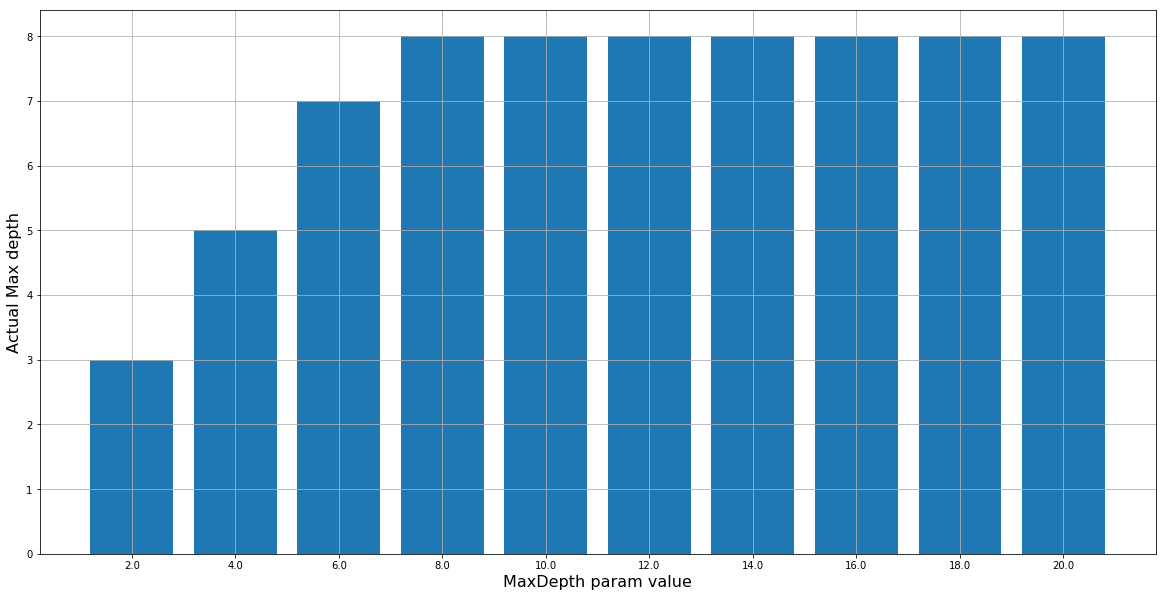

In [35]:
# my own grid search 
# Set the parameters by cross-validation

depths = []
train_scores = []
test_scores = []

for max_depth in max_depths:
    estimator = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    estimator.fit(X_train, y_train)
    depths.append(dectree_max_depth(estimator.tree_))
    train_scores.append(estimator.score(X_train, y_train))
    test_scores.append(estimator.score(X_test, y_test))

# plt.figure(figsize=(20, 10))
# plt.ylabel('Accuracy', fontsize=20)
# plt.xlabel('Max Depth')
# plt.plot(max_depths, train_scores, label='train')
# plt.plot(max_depths, test_scores, label='test')
# plt.legend(loc='best')
# plt.show()     
plot_grid_search(gs.cv_results_, tuned_parameters[0]['max_depth'], 'Max depth', set_x_log=False)


plt.figure(figsize=(20, 10))
plt.bar([i for i in range(len(tuned_parameters[0]['max_depth']))], depths)
plt.ylabel('Actual Max depth', fontsize=16)
plt.xlabel('MaxDepth param value', fontsize=16)
plt.grid(True)
plt.xticks([i for i in range(len(tuned_parameters[0]['max_depth']))], tuple(max_depths))
plt.show()

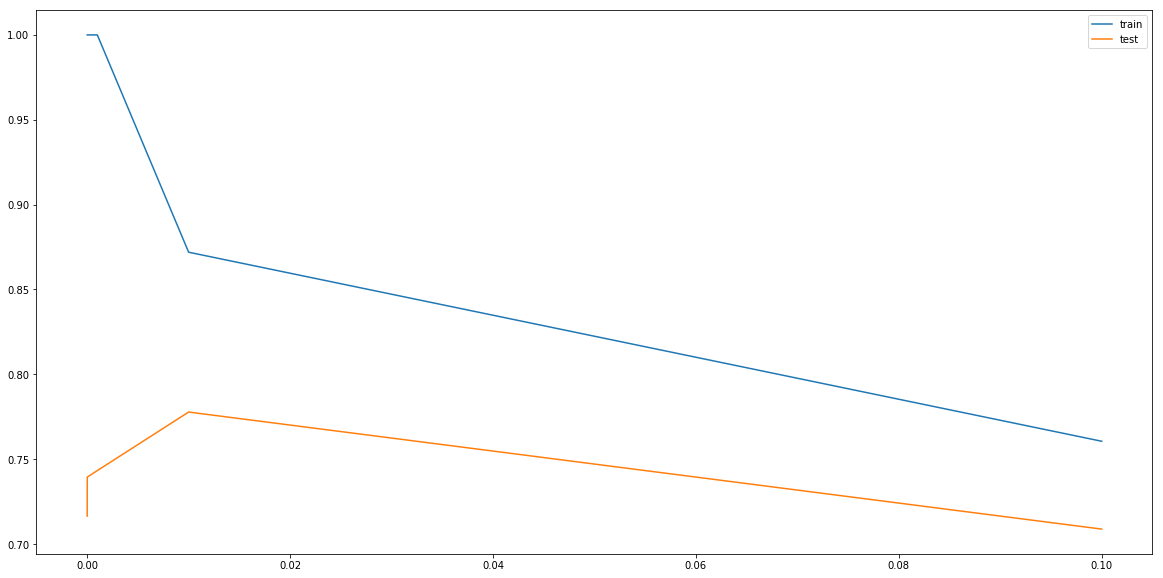

In [45]:
# a promising tree (looks pretty)
min_samples_leafs=[1e-8, 1e-5, 1e-3, 1e-2, 1e-1]
train_scores = []
test_scores = []
for min_samples_leaf in min_samples_leafs:
    estimator = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=30, min_impurity_decrease=1e-5, min_samples_leaf=min_samples_leaf)
    estimator.fit(X_train, y_train)
    train_scores.append(estimator.score(X_train, y_train))
    test_scores.append(estimator.score(X_test, y_test))
    
plt.figure(figsize=(20, 10))
plt.plot(min_samples_leafs, train_scores, label='train')
plt.plot(min_samples_leafs, test_scores, label='test')
plt.legend(loc='best')
plt.show()
    

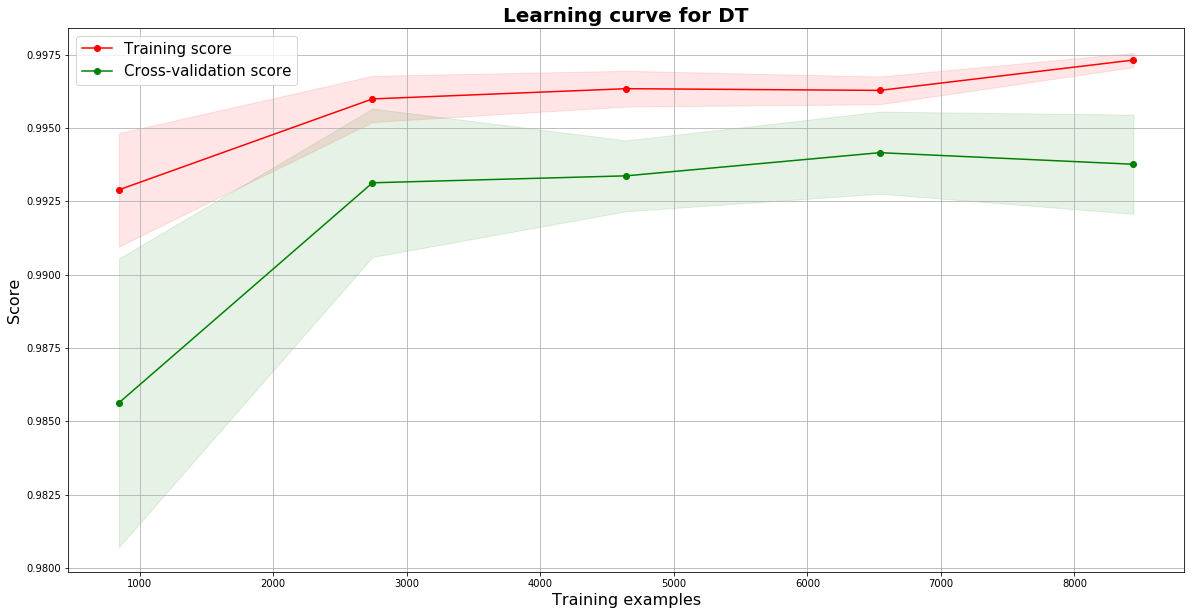

In [41]:
# pick the best decision tree and plot learning curve for it
estimator =gs.best_estimator_
title = 'Learning curve for DT'
plot_learning_curve(estimator, title, X_train, y_train)
plt.show() 


/Users/whe318/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


inner train size: 1266, inner test size: 11399
inner train size: 4115, inner test size: 8550
inner train size: 6965, inner test size: 5700
inner train size: 9814, inner test size: 2851
inner train size: 12663, inner test size: 2


/Users/whe318/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


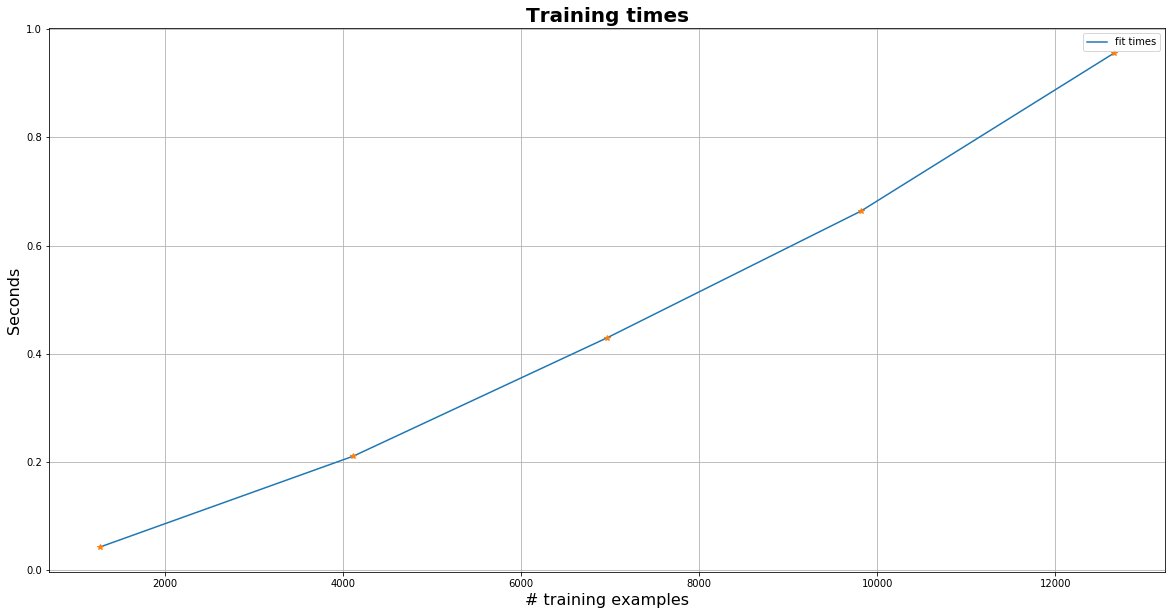

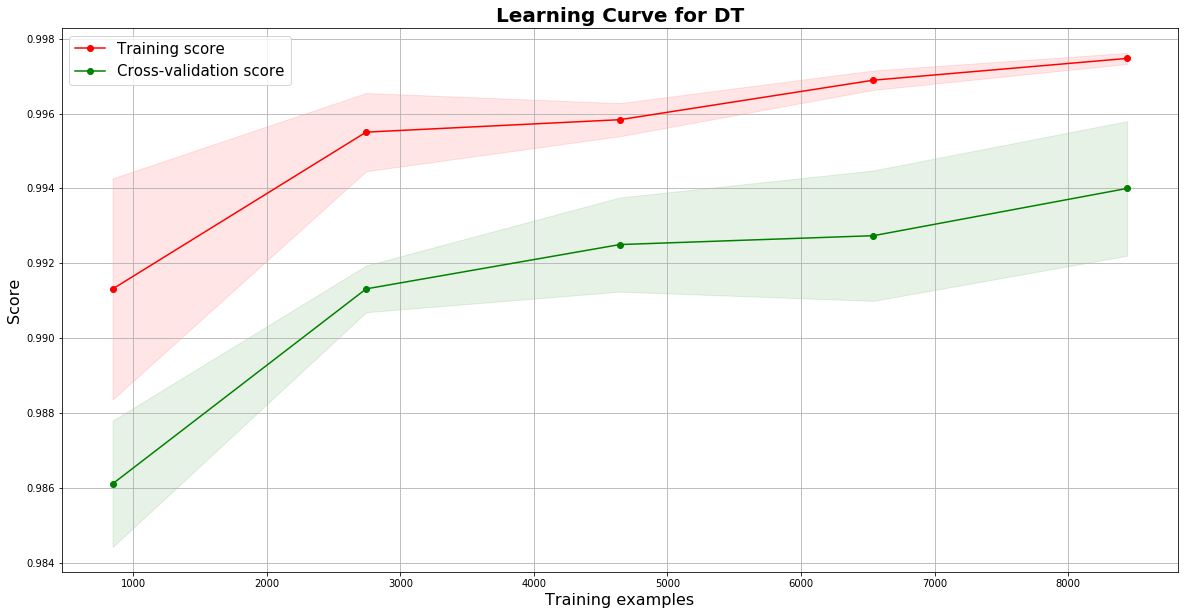

In [44]:
# pick the best n_neighbor and plot learning curve for it
# my own learning curve generator

X_test, y_test
train_sizes = []
train_scores=[]
test_scores=[]
fit_times=[]
for frac in np.linspace(0.1, 0.9999, 5):
    inner_train_X, inner_test_X, inner_train_y, inner_test_y = train_test_split(X_train, y_train, train_size=frac, shuffle=True, stratify=y_train)
    print("inner train size: {}, inner test size: {}".format(len(inner_train_X), len(inner_test_X)))
    train_sizes.append(len(inner_train_X))
    start = time.time()
    estimator.fit(inner_train_X, inner_train_y)
    fit_times.append(time.time() - start)
    train_scores.append(estimator.score(inner_train_X, inner_train_y))
    test_scores.append(estimator.score(X_test, y_test)) # score on the original test set
    
# plt.figure(figsize=(20,10))
# plt.plot(train_sizes, train_scores, label='train')
# plt.plot(train_sizes, test_scores, label='test')
# plt.legend(loc='best')
# plt.show()
    
# associate the train times with the learning curve
plt.figure(figsize=(20,10))
plt.plot(train_sizes, fit_times, label='fit times')
plt.plot(train_sizes, fit_times, '*')
plt.ylabel('Seconds', fontsize=16)
plt.xlabel('# training examples', fontsize=16)
plt.title('Training times', fontsize=20, fontweight='bold')
plt.legend(loc='best')
plt.grid('on')
# plt.show()

title = 'Learning Curve for DT'
plot_learning_curve(estimator, title, X_train, y_train)
plt.show() 
    

0.7854406130268199

In [42]:
# do this next
# export tree to .png
tree.export_graphviz(estimator, out_file='tree1.dot', class_names=['yes', 'no'], filled=True, leaves_parallel=True)